In [48]:
import pandas as pd

df = pd.read_csv("my_api_data.csv")
print(df.head(10))

        id                                   title  \
0   912649                   Venom: The Last Dance   
1  1034541                             Terrifier 3   
2  1118031  Apocalypse Z: The Beginning of the End   
3  1184918                          The Wild Robot   
4   933260                           The Substance   
5   698687                        Transformers One   
6   533535                    Deadpool & Wolverine   
7   845781                                 Red One   
8   945961                          Alien: Romulus   
9  1051896                                Arcadian   

                        original_title release_date  \
0                Venom: The Last Dance   2024-10-22   
1                          Terrifier 3   2024-10-09   
2  Apocalipsis Z: el principio del fin   2024-10-04   
3                       The Wild Robot   2024-09-12   
4                        The Substance   2024-09-07   
5                     Transformers One   2024-09-11   
6                 De

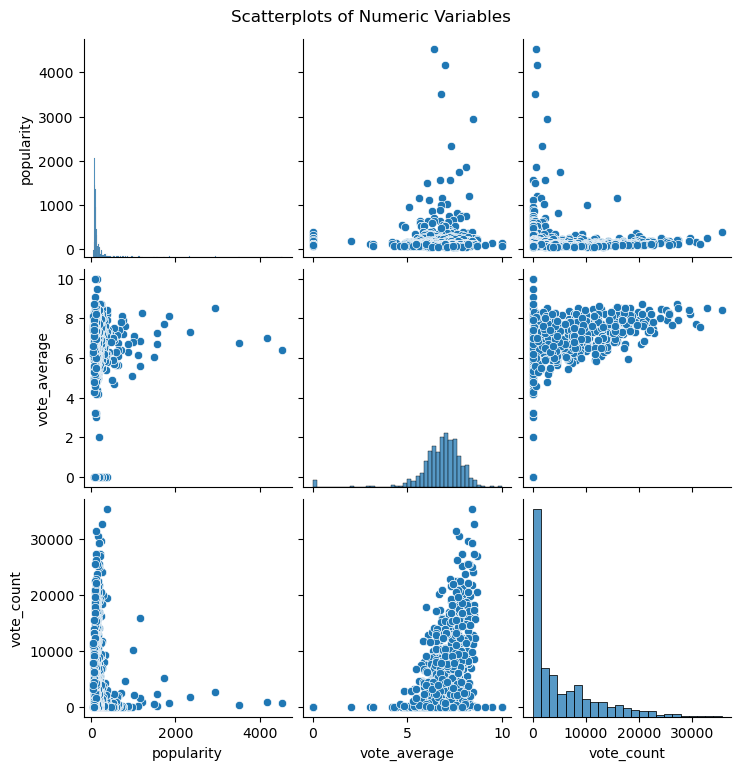

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_data = df[['popularity', 'vote_average', 'vote_count']]
matrix = corr_data.corr()

sns.pairplot(corr_data)
plt.suptitle("Scatterplots of Numeric Variables", y = 1.02)
plt.show()


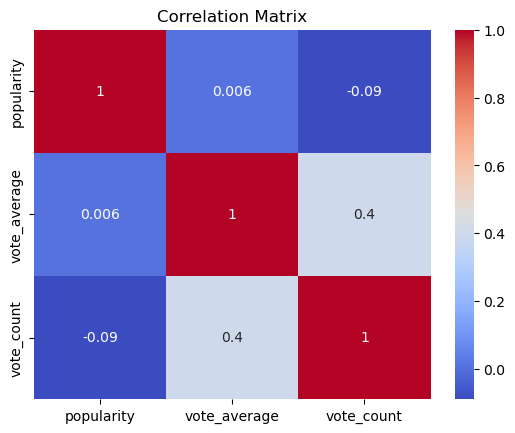

In [50]:
corr = corr_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [51]:
summary = df.describe()
print(summary)

                 id   popularity  vote_average    vote_count
count  1.000000e+03  1000.000000   1000.000000   1000.000000
mean   5.249710e+05   170.677765      6.821548   5343.818000
std    4.447215e+05   296.077398      1.183695   6546.637458
min    1.100000e+01    44.124000      0.000000      0.000000
25%    4.904475e+04    84.172500      6.398750    202.500000
50%    4.520415e+05   104.594000      6.960000   2676.000000
75%    9.517832e+05   148.993000      7.500000   8266.500000
max    1.373893e+06  4533.723000     10.000000  35531.000000


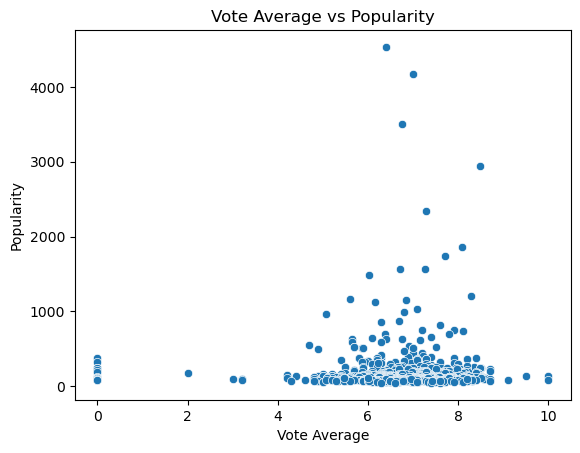

In [52]:
sns.scatterplot(data = df, x = 'vote_average', y = 'popularity')
plt.title("Vote Average vs Popularity")
plt.xlabel("Vote Average")
plt.ylabel("Popularity")
plt.show()

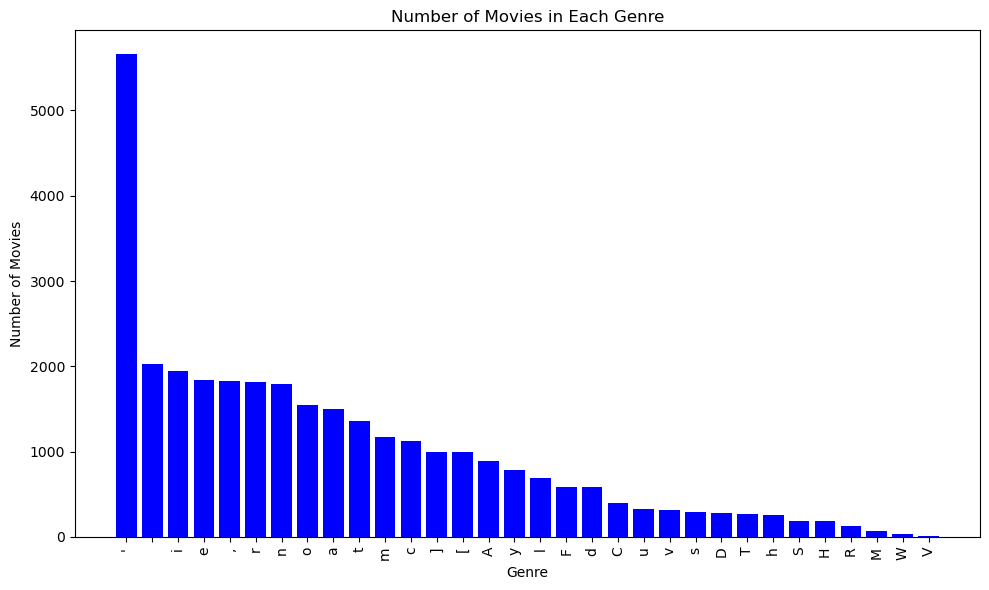

In [56]:
from collections import Counter

genres = [genre for sublist in df['genre_names'] for genre in sublist]
counts = Counter(genres)

counts = pd.DataFrame(counts.items(), columns = ['Genre', 'Count'])
counts_df = counts.sort_values(by = "Count", ascending = False)

plt.figure(figsize = (10, 6))
plt.bar(counts_df['Genre'], counts_df['Count'], color = 'blue')
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Number of Movies in Each Genre")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

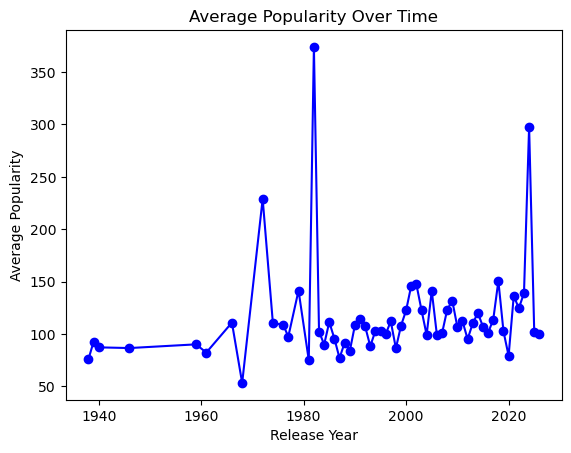

In [57]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
popularity_trend = df.groupby('release_year')['popularity'].mean()
popularity_trend.plot(kind='line', marker='o', color='blue')
plt.title("Average Popularity Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average Popularity")
plt.show()

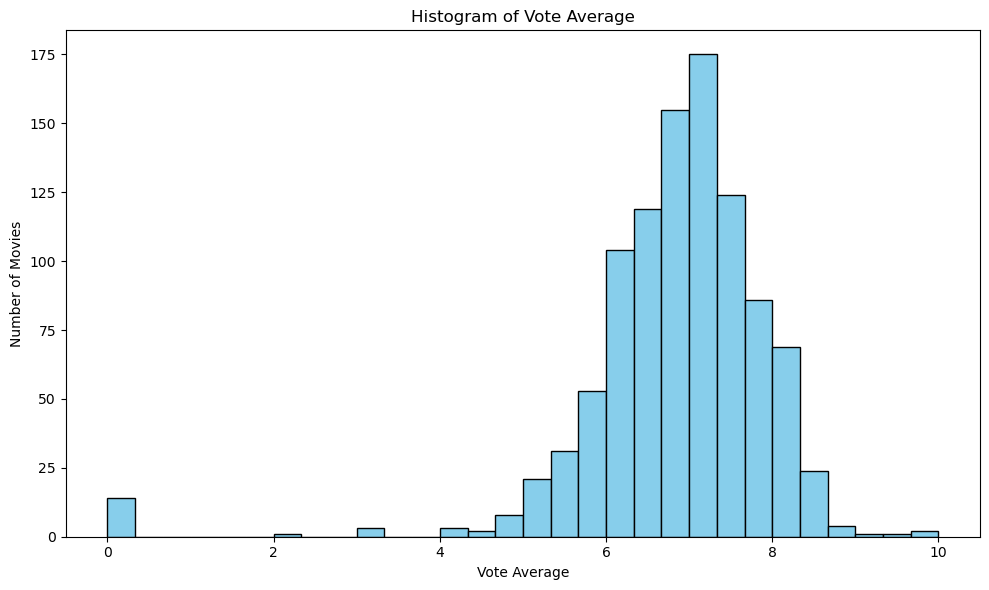

In [55]:
plt.figure(figsize=(10, 6))
plt.hist(df['vote_average'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Vote Average')
plt.ylabel('Number of Movies')
plt.title('Histogram of Vote Average')
plt.tight_layout()
plt.show()